Import required module

In [1]:
from version2.crossover import point_crossover, ordered_crossover, ordered_crossover_np, partialmap_crossover, no_crossover
from version2.mutation import mutate, multi_mutate, inversion, scramble
from version2.replacement import replace_firstweak, replace_weakest
from version2.utils import load_metrics, generate_population, parents_selection, create_chromosome, best_gene, pop_stats, create_parameter_list, find_combinations
from version2.genetic import search
from version2.visualization import draw_cost, draw_fitness, draw_cost_seperate , draw_fitness_seperate , draw_fitnesses

import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(1234)

setting up distance metric

In [2]:
burma = './dataset/burma14.xml'
brazil = './dataset/brazil58.xml'
burma_metric = load_metrics(burma)
brazil_metric = load_metrics(brazil)
distance_metrics = [burma_metric,brazil_metric]
print([x.shape for x in distance_metrics])

[(14, 14), (58, 58)]


d:\USERS\Exeter\Courses\Module ECMM409 (2023) Nature-Inspired Computation\Nature_inspired\project01\version2\utils.py:17: RuntimeWarning: invalid value encountered in multiply
  weights_metric = np.nan_to_num(np.identity(num_node) * -np.inf, 0.0)


Set up the parameter for the experiment

In [3]:
# customize it depend on your design
max_gens = 100 
pop_size = 50
tour_size = 5
cross_fn = point_crossover
mut_fn = mutate
replace_fn = replace_firstweak

## Initialize the experiment

### Round-1

In [4]:
exp_result = []
for metric in distance_metrics:
    print(f'metric {(np.array(metric).shape)}')
    result = search(metric, max_gens, pop_size, tour_size, cross_fn, mut_fn, replace_fn)
    exp_result.append(result)
# burma stats
burma_res = exp_result[0]
burma_last_pop = burma_res['lasted_population']
burma_avg_fitnessv = burma_res['avg_fitness']
burma_max_fitnessv = burma_res['max_fitness']
burma_last_gen = burma_res['last_generation']
burma_best_gene = burma_res['best_candidate']
burma_original = burma_res['first_population']
# brazil stats
brazil_res = exp_result[1]
brazil_last_pop = brazil_res['lasted_population']
brazil_avg_fitnessv = brazil_res['avg_fitness']
brazil_max_fitnessv = brazil_res['max_fitness']
brazil_last_gen = brazil_res['last_generation']
brazil_best_gene = brazil_res['best_candidate']
brazil_original = brazil_res['first_population']

metric (14, 14)
evolved through 100 generations
metric (58, 58)
evolved through 100 generations


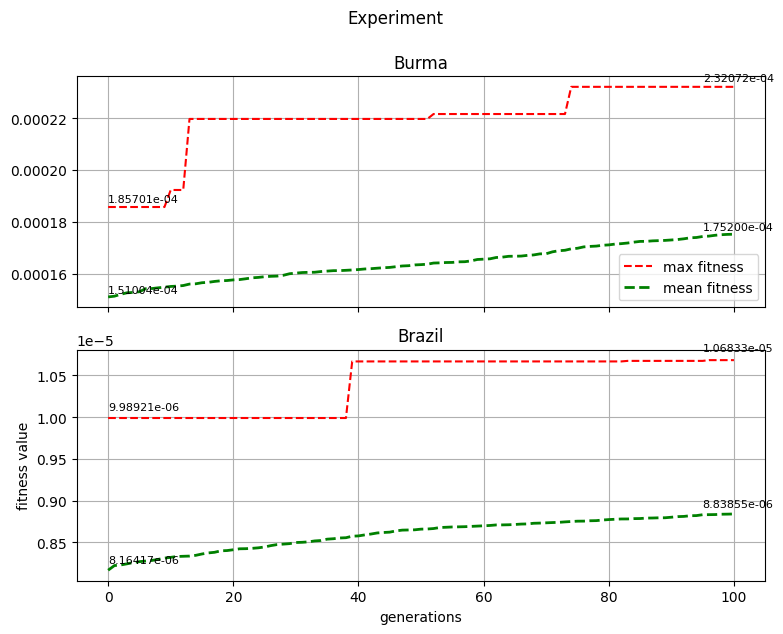

In [5]:
draw_fitnesses(burma_max_fitnessv,burma_avg_fitnessv,brazil_max_fitnessv,brazil_avg_fitnessv)
# draw_cost(burma_max_fitnessv, burma_avg_fitnessv)

In [6]:
# draw_fitness(brazil_max_fitnessv, brazil_avg_fitnessv)
# draw_cost(brazil_max_fitnessv, brazil_avg_fitnessv)

### Round-2 increase only population size

increasing population size

In [7]:
pop_size=500

metric (14, 14)
evolved through 100 generations
metric (58, 58)
evolved through 100 generations


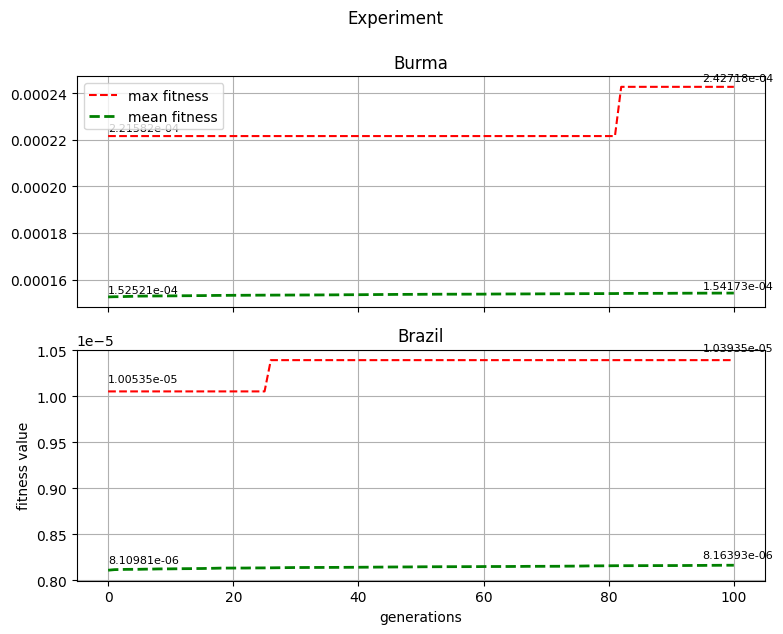

In [8]:
exp_result = []
for metric in distance_metrics:
    print(f'metric {(np.array(metric).shape)}')
    result = search(metric, max_gens, pop_size, tour_size, cross_fn, mut_fn, replace_fn)
    exp_result.append(result)
# burma stats
burma_res = exp_result[0]
burma_last_pop = burma_res['lasted_population']
burma_avg_fitnessv = burma_res['avg_fitness']
burma_max_fitnessv = burma_res['max_fitness']
burma_last_gen = burma_res['last_generation']
burma_best_gene = burma_res['best_candidate']
burma_original = burma_res['first_population']
# brazil stats
brazil_res = exp_result[1]
brazil_last_pop = brazil_res['lasted_population']
brazil_avg_fitnessv = brazil_res['avg_fitness']
brazil_max_fitnessv = brazil_res['max_fitness']
brazil_last_gen = brazil_res['last_generation']
brazil_best_gene = brazil_res['best_candidate']
brazil_original = brazil_res['first_population']

draw_fitnesses(burma_max_fitnessv,burma_avg_fitnessv,brazil_max_fitnessv,brazil_avg_fitnessv)

### Round-3 increase pop_size and max_gens

metric (14, 14)
evolved through 500 generations
metric (58, 58)
evolved through 500 generations


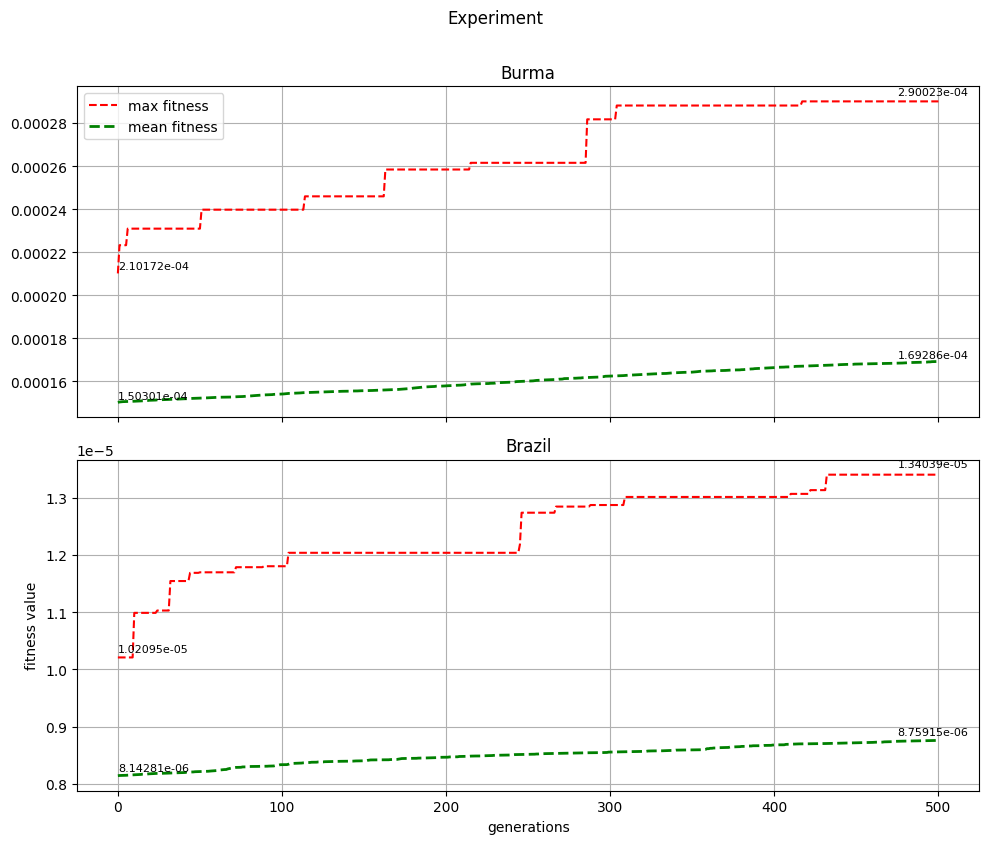

In [15]:
max_gens = 500
pop_size=500

exp_result = []
for metric in distance_metrics:
    print(f'metric {(np.array(metric).shape)}')
    result = search(metric, max_gens, pop_size, tour_size, cross_fn, mut_fn, replace_fn)
    exp_result.append(result)
# burma stats
burma_res = exp_result[0]
burma_last_pop = burma_res['lasted_population']
burma_avg_fitnessv = burma_res['avg_fitness']
burma_max_fitnessv = burma_res['max_fitness']
burma_last_gen = burma_res['last_generation']
burma_best_gene = burma_res['best_candidate']
burma_original = burma_res['first_population']
# brazil stats
brazil_res = exp_result[1]
brazil_last_pop = brazil_res['lasted_population']
brazil_avg_fitnessv = brazil_res['avg_fitness']
brazil_max_fitnessv = brazil_res['max_fitness']
brazil_last_gen = brazil_res['last_generation']
brazil_best_gene = brazil_res['best_candidate']
brazil_original = brazil_res['first_population']

draw_fitnesses(burma_max_fitnessv,burma_avg_fitnessv,brazil_max_fitnessv,brazil_avg_fitnessv)

In [24]:
### Round-4 increase max_gens pop_size tour_size

metric (14, 14)
evolved through 500 generations
metric (58, 58)
evolved through 500 generations


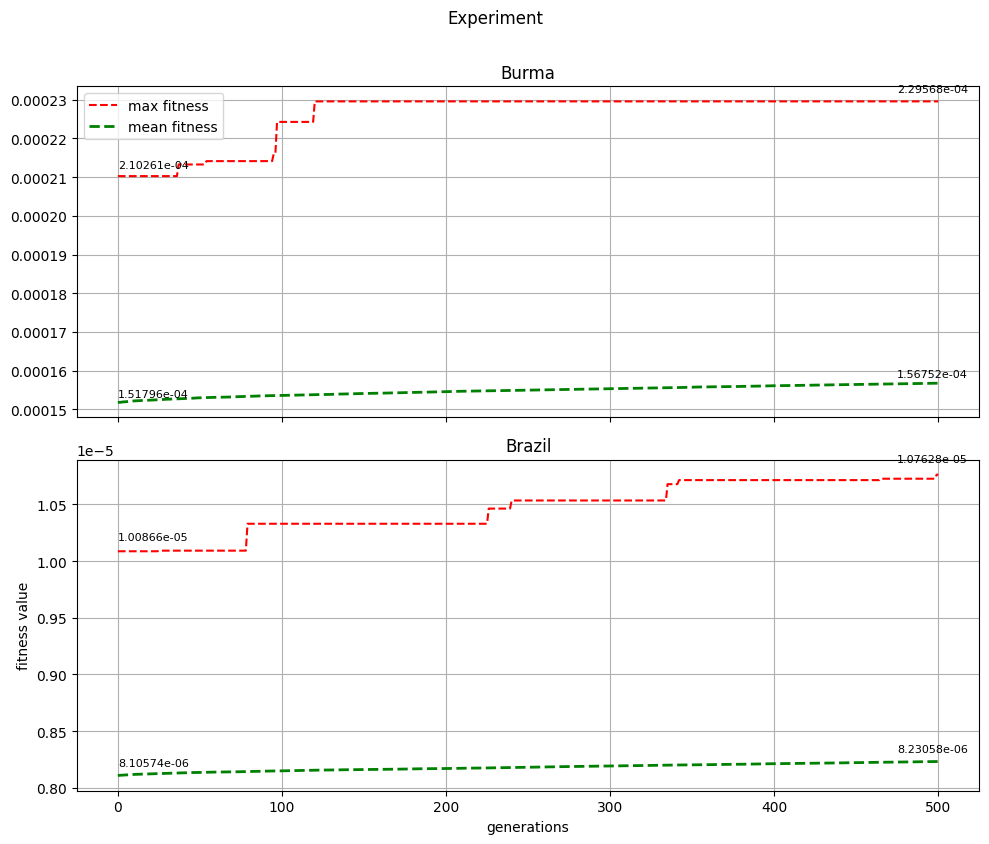

In [17]:
max_gens =500
pop_size=500
tour_size=10

exp_result = []
for metric in distance_metrics:
    print(f'metric {(np.array(metric).shape)}')
    result = search(metric, max_gens, pop_size, tour_size, cross_fn, mut_fn, replace_fn)
    exp_result.append(result)
# burma stats
burma_res = exp_result[0]
burma_last_pop = burma_res['lasted_population']
burma_avg_fitnessv = burma_res['avg_fitness']
burma_max_fitnessv = burma_res['max_fitness']
burma_last_gen = burma_res['last_generation']
burma_best_gene = burma_res['best_candidate']
burma_original = burma_res['first_population']
# brazil stats
brazil_res = exp_result[1]
brazil_last_pop = brazil_res['lasted_population']
brazil_avg_fitnessv = brazil_res['avg_fitness']
brazil_max_fitnessv = brazil_res['max_fitness']
brazil_last_gen = brazil_res['last_generation']
brazil_best_gene = brazil_res['best_candidate']
brazil_original = brazil_res['first_population']

draw_fitnesses(burma_max_fitnessv,burma_avg_fitnessv,brazil_max_fitnessv,brazil_avg_fitnessv)

metric (14, 14)
evolved through 500 generations
metric (58, 58)
evolved through 500 generations


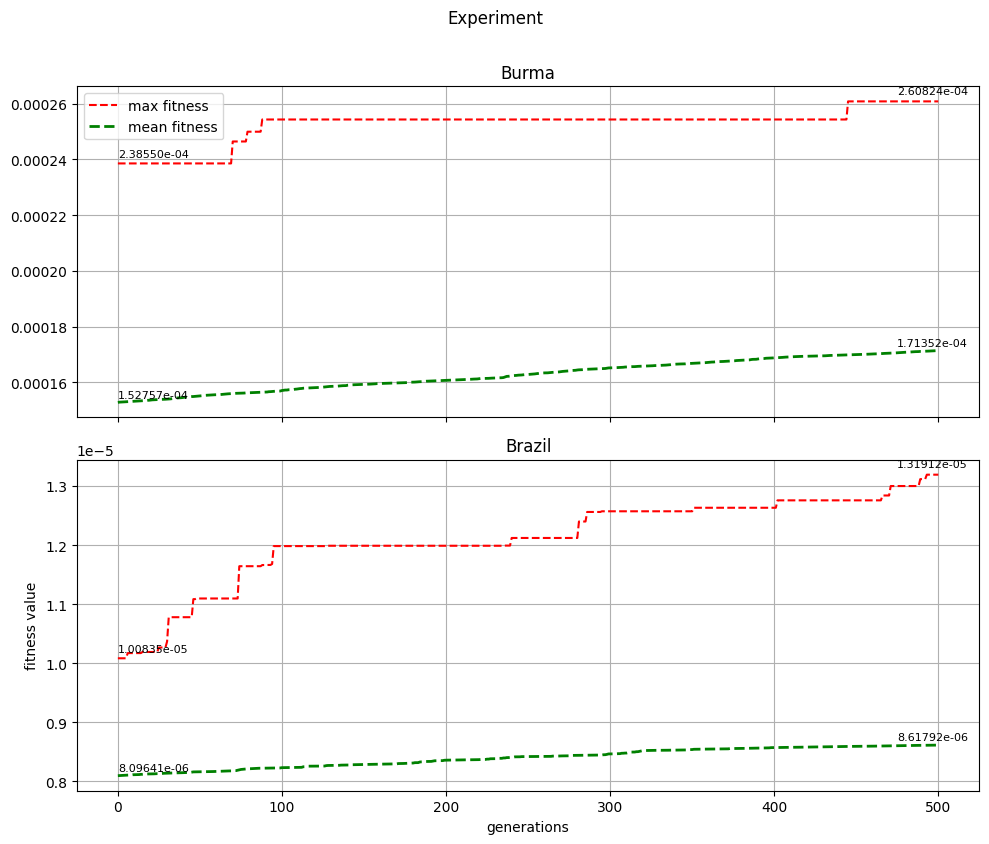

In [25]:
max_gens = 500
pop_size=500
tour_size=100

exp_result = []
for metric in distance_metrics:
    print(f'metric {(np.array(metric).shape)}')
    result = search(metric, max_gens, pop_size, tour_size, cross_fn, mut_fn, replace_fn)
    exp_result.append(result)
# burma stats
burma_res = exp_result[0]
burma_last_pop = burma_res['lasted_population']
burma_avg_fitnessv = burma_res['avg_fitness']
burma_max_fitnessv = burma_res['max_fitness']
burma_last_gen = burma_res['last_generation']
burma_best_gene = burma_res['best_candidate']
burma_original = burma_res['first_population']
# brazil stats
brazil_res = exp_result[1]
brazil_last_pop = brazil_res['lasted_population']
brazil_avg_fitnessv = brazil_res['avg_fitness']
brazil_max_fitnessv = brazil_res['max_fitness']
brazil_last_gen = brazil_res['last_generation']
brazil_best_gene = brazil_res['best_candidate']
brazil_original = brazil_res['first_population']

draw_fitnesses(burma_max_fitnessv,burma_avg_fitnessv,brazil_max_fitnessv,brazil_avg_fitnessv)

### Round5- increase tour_size overly

metric (14, 14)
evolved through 500 generations
metric (58, 58)
evolved through 500 generations


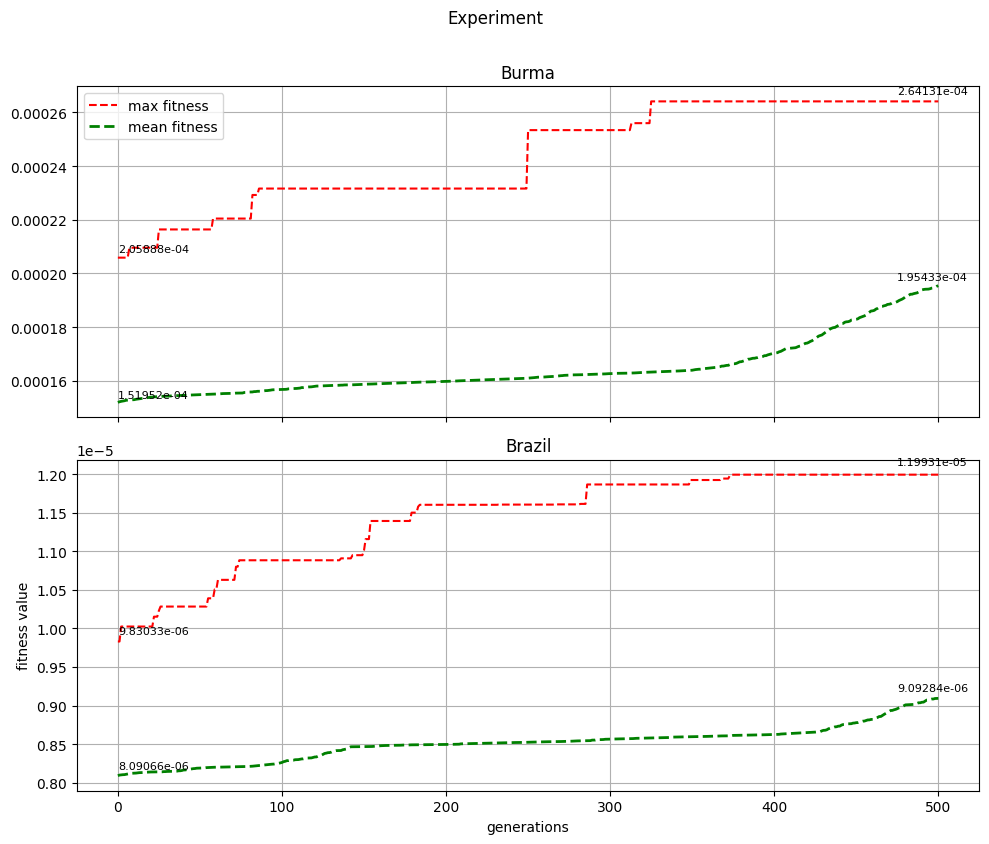

In [19]:
max_gens = 500
pop_size=500
tour_size=400

exp_result = []
for metric in distance_metrics:
    print(f'metric {(np.array(metric).shape)}')
    result = search(metric, max_gens, pop_size, tour_size, cross_fn, mut_fn, replace_fn)
    exp_result.append(result)
# burma stats
burma_res = exp_result[0]
burma_last_pop = burma_res['lasted_population']
burma_avg_fitnessv = burma_res['avg_fitness']
burma_max_fitnessv = burma_res['max_fitness']
burma_last_gen = burma_res['last_generation']
burma_best_gene = burma_res['best_candidate']
burma_original = burma_res['first_population']
# brazil stats
brazil_res = exp_result[1]
brazil_last_pop = brazil_res['lasted_population']
brazil_avg_fitnessv = brazil_res['avg_fitness']
brazil_max_fitnessv = brazil_res['max_fitness']
brazil_last_gen = brazil_res['last_generation']
brazil_best_gene = brazil_res['best_candidate']
brazil_original = brazil_res['first_population']

draw_fitnesses(burma_max_fitnessv,burma_avg_fitnessv,brazil_max_fitnessv,brazil_avg_fitnessv)

metric (14, 14)
evolved through 1000 generations
metric (58, 58)
evolved through 1000 generations


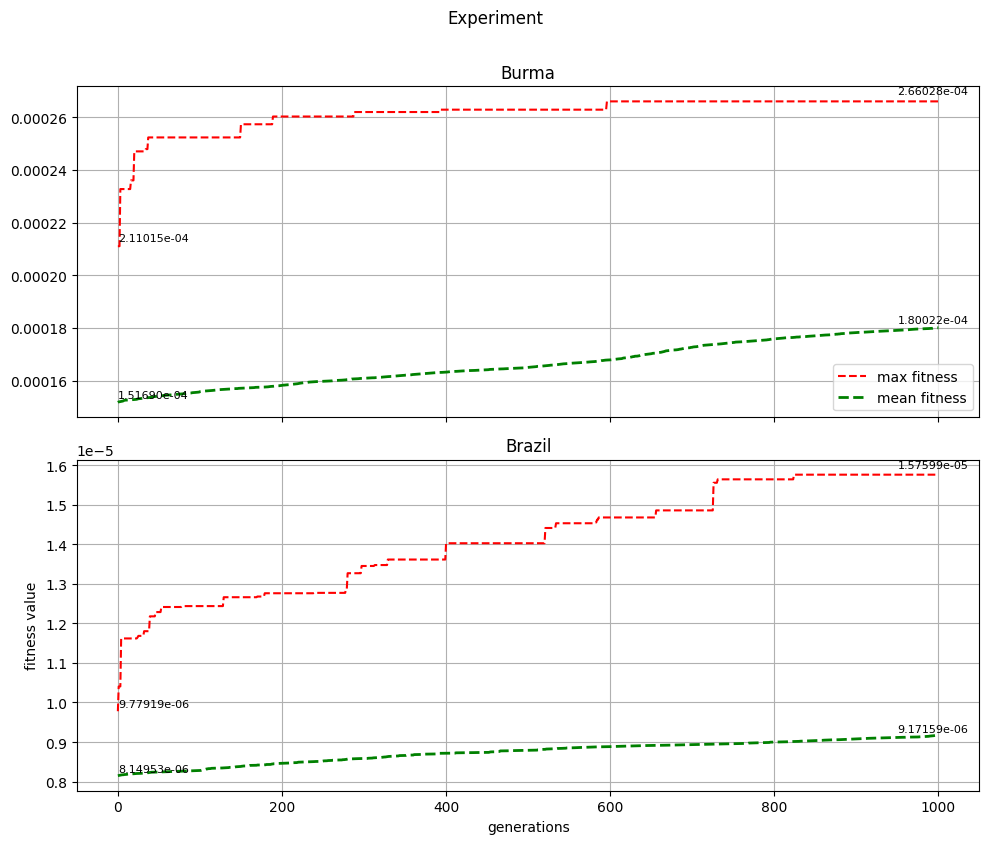

In [23]:
### Round-6 increase max_gen and rewind tour_size
max_gens = 1000
pop_size=500
tour_size=100

exp_result = []
for metric in distance_metrics:
    print(f'metric {(np.array(metric).shape)}')
    result = search(metric, max_gens, pop_size, tour_size, cross_fn, mut_fn, replace_fn)
    exp_result.append(result)
# burma stats
burma_res = exp_result[0]
burma_last_pop = burma_res['lasted_population']
burma_avg_fitnessv = burma_res['avg_fitness']
burma_max_fitnessv = burma_res['max_fitness']
burma_last_gen = burma_res['last_generation']
burma_best_gene = burma_res['best_candidate']
burma_original = burma_res['first_population']
# brazil stats
brazil_res = exp_result[1]
brazil_last_pop = brazil_res['lasted_population']
brazil_avg_fitnessv = brazil_res['avg_fitness']
brazil_max_fitnessv = brazil_res['max_fitness']
brazil_last_gen = brazil_res['last_generation']
brazil_best_gene = brazil_res['best_candidate']
brazil_original = brazil_res['first_population']

draw_fitnesses(burma_max_fitnessv,burma_avg_fitnessv,brazil_max_fitnessv,brazil_avg_fitnessv)

### Round-7 maximux max_gen

metric (14, 14)
evolved through 10000 generations
metric (58, 58)
evolved through 10000 generations


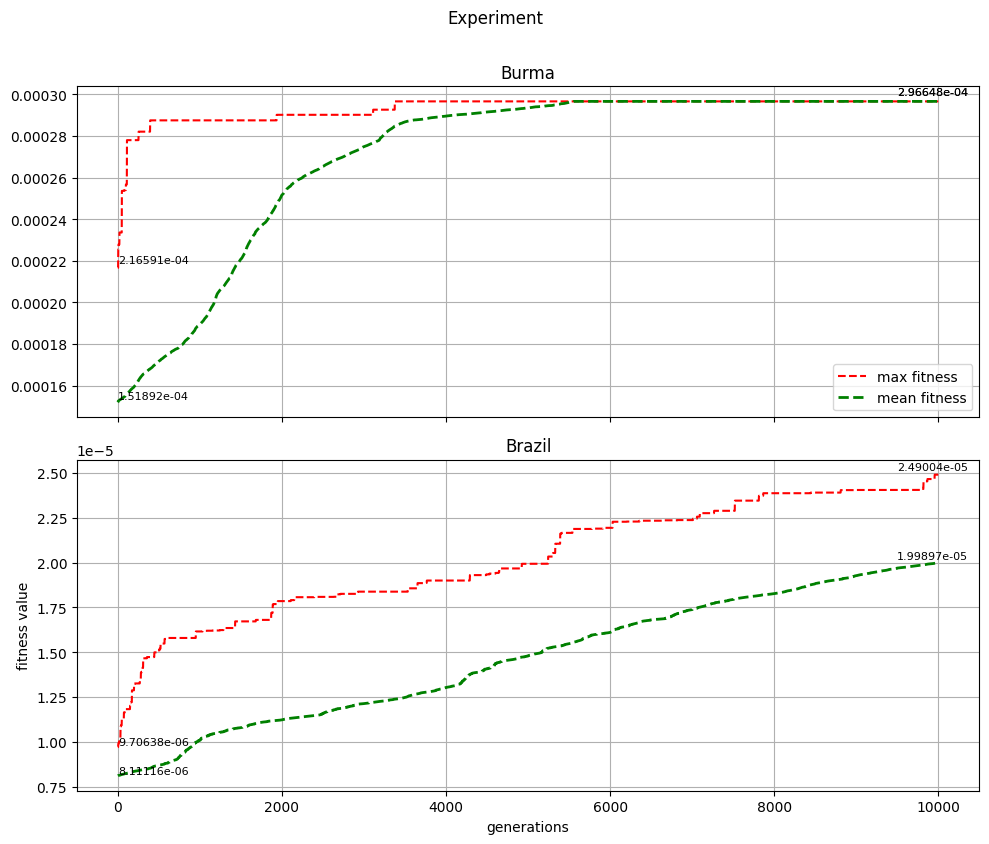

In [26]:
### Round-6 increase max_gen and rewind tour_size
max_gens = 10000
pop_size=500
tour_size=100

exp_result = []
for metric in distance_metrics:
    print(f'metric {(np.array(metric).shape)}')
    result = search(metric, max_gens, pop_size, tour_size, cross_fn, mut_fn, replace_fn)
    exp_result.append(result)
# burma stats
burma_res = exp_result[0]
burma_last_pop = burma_res['lasted_population']
burma_avg_fitnessv = burma_res['avg_fitness']
burma_max_fitnessv = burma_res['max_fitness']
burma_last_gen = burma_res['last_generation']
burma_best_gene = burma_res['best_candidate']
burma_original = burma_res['first_population']
# brazil stats
brazil_res = exp_result[1]
brazil_last_pop = brazil_res['lasted_population']
brazil_avg_fitnessv = brazil_res['avg_fitness']
brazil_max_fitnessv = brazil_res['max_fitness']
brazil_last_gen = brazil_res['last_generation']
brazil_best_gene = brazil_res['best_candidate']
brazil_original = brazil_res['first_population']

draw_fitnesses(burma_max_fitnessv,burma_avg_fitnessv,brazil_max_fitnessv,brazil_avg_fitnessv)

### Round-8 maximum max_gen and pop_size

metric (14, 14)
evolved through 1000 generations
metric (58, 58)
evolved through 1000 generations


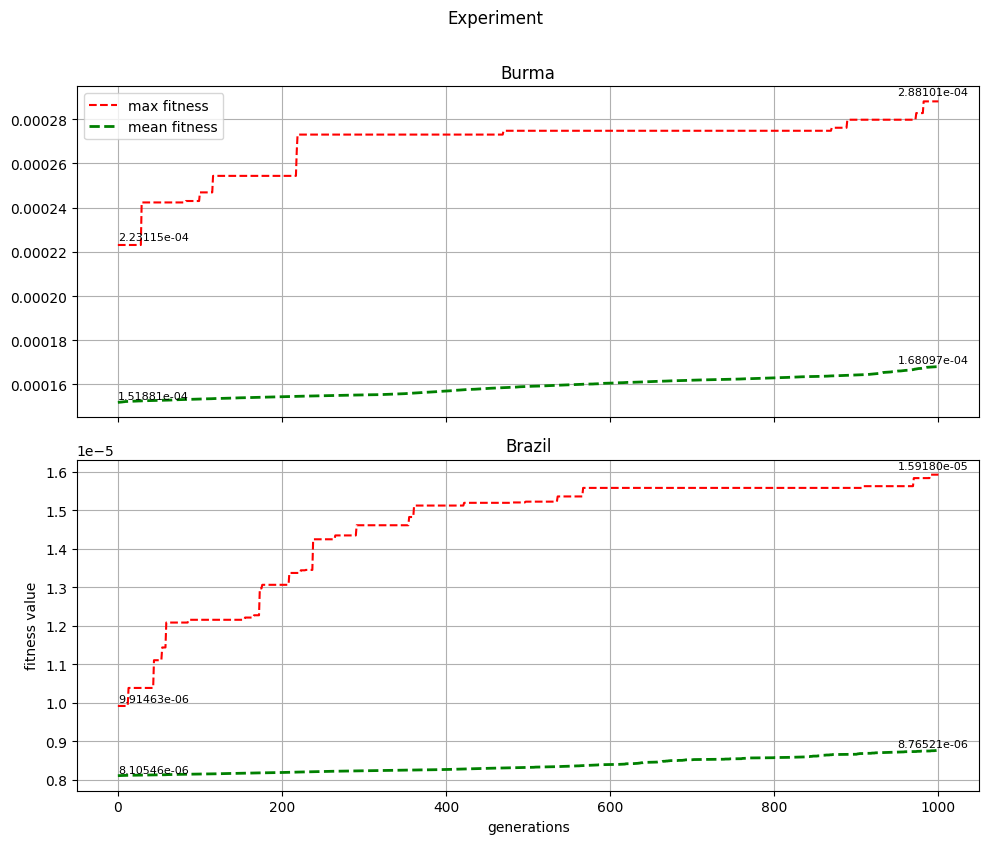

In [28]:
### Round-6 increase max_gen and rewind tour_size
max_gens = 1000
pop_size=1000
tour_size=100

exp_result = []
for metric in distance_metrics:
    print(f'metric {(np.array(metric).shape)}')
    result = search(metric, max_gens, pop_size, tour_size, cross_fn, mut_fn, replace_fn)
    exp_result.append(result)
# burma stats
burma_res = exp_result[0]
burma_last_pop = burma_res['lasted_population']
burma_avg_fitnessv = burma_res['avg_fitness']
burma_max_fitnessv = burma_res['max_fitness']
burma_last_gen = burma_res['last_generation']
burma_best_gene = burma_res['best_candidate']
burma_original = burma_res['first_population']
# brazil stats
brazil_res = exp_result[1]
brazil_last_pop = brazil_res['lasted_population']
brazil_avg_fitnessv = brazil_res['avg_fitness']
brazil_max_fitnessv = brazil_res['max_fitness']
brazil_last_gen = brazil_res['last_generation']
brazil_best_gene = brazil_res['best_candidate']
brazil_original = brazil_res['first_population']

draw_fitnesses(burma_max_fitnessv,burma_avg_fitnessv,brazil_max_fitnessv,brazil_avg_fitnessv)

### Round-9 max everything

metric (14, 14)
evolved through 10000 generations
metric (58, 58)
evolved through 10000 generations


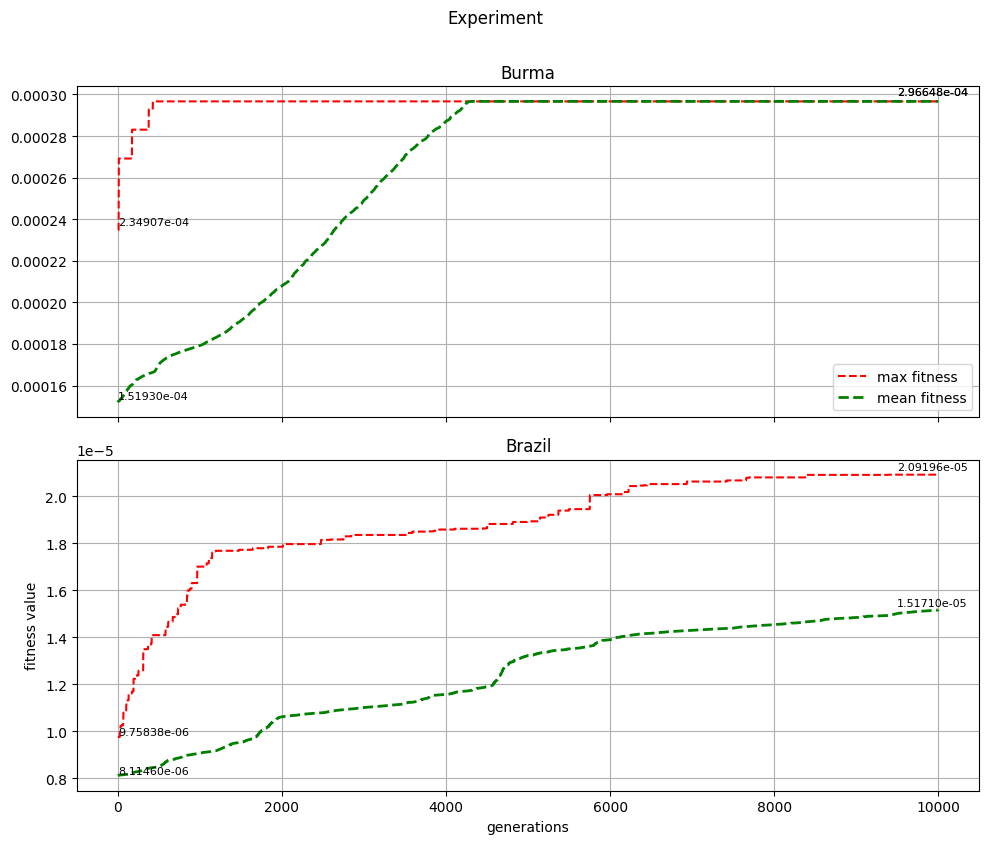

In [29]:
### Round-6 increase max_gen and rewind tour_size
max_gens = 10000
pop_size=1000
tour_size=500

exp_result = []
for metric in distance_metrics:
    print(f'metric {(np.array(metric).shape)}')
    result = search(metric, max_gens, pop_size, tour_size, cross_fn, mut_fn, replace_fn)
    exp_result.append(result)
# burma stats
burma_res = exp_result[0]
burma_last_pop = burma_res['lasted_population']
burma_avg_fitnessv = burma_res['avg_fitness']
burma_max_fitnessv = burma_res['max_fitness']
burma_last_gen = burma_res['last_generation']
burma_best_gene = burma_res['best_candidate']
burma_original = burma_res['first_population']
# brazil stats
brazil_res = exp_result[1]
brazil_last_pop = brazil_res['lasted_population']
brazil_avg_fitnessv = brazil_res['avg_fitness']
brazil_max_fitnessv = brazil_res['max_fitness']
brazil_last_gen = brazil_res['last_generation']
brazil_best_gene = brazil_res['best_candidate']
brazil_original = brazil_res['first_population']

draw_fitnesses(burma_max_fitnessv,burma_avg_fitnessv,brazil_max_fitnessv,brazil_avg_fitnessv)

metric (14, 14)
evolved through 10000 generations
metric (58, 58)
evolved through 10000 generations


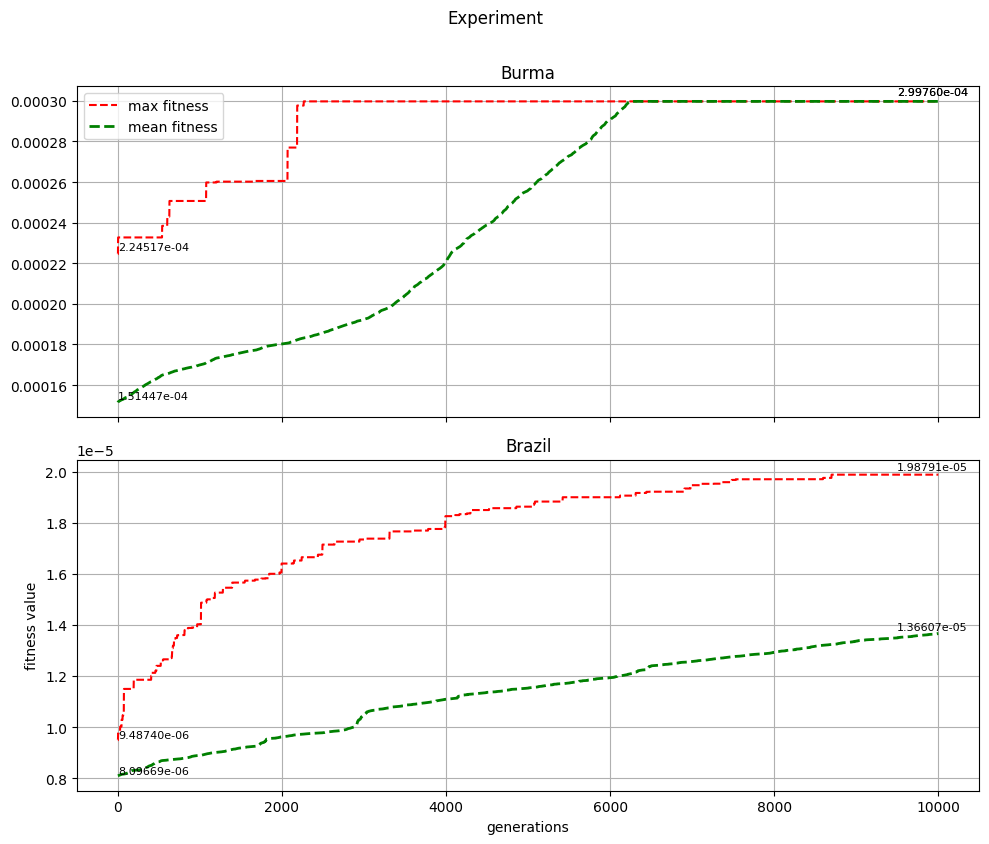

In [30]:
### Round-6 increase max_gen and rewind tour_size
max_gens = 10000
pop_size=1000
tour_size=500

exp_result = []
for metric in distance_metrics:
    print(f'metric {(np.array(metric).shape)}')
    result = search(metric, max_gens, pop_size, tour_size, cross_fn, mut_fn, replace_fn)
    exp_result.append(result)
# burma stats
burma_res = exp_result[0]
burma_last_pop = burma_res['lasted_population']
burma_avg_fitnessv = burma_res['avg_fitness']
burma_max_fitnessv = burma_res['max_fitness']
burma_last_gen = burma_res['last_generation']
burma_best_gene = burma_res['best_candidate']
burma_original = burma_res['first_population']
# brazil stats
brazil_res = exp_result[1]
brazil_last_pop = brazil_res['lasted_population']
brazil_avg_fitnessv = brazil_res['avg_fitness']
brazil_max_fitnessv = brazil_res['max_fitness']
brazil_last_gen = brazil_res['last_generation']
brazil_best_gene = brazil_res['best_candidate']
brazil_original = brazil_res['first_population']

draw_fitnesses(burma_max_fitnessv,burma_avg_fitnessv,brazil_max_fitnessv,brazil_avg_fitnessv)